<a href="https://colab.research.google.com/github/Borhanuddin672012/Sample_coding/blob/main/FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An Introduction to Time Series Forecasting with Prophet in Exploratory

Using the ‘Prophet’ to forecast the time series data in Exploratory is super simple

.
**Sales Data**

I’m going to use this sample sales data and try to forecast the sales for the next year.

[link text](https://blog.exploratory.io/an-introduction-to-time-series-forecasting-with-prophet-package-in-exploratory-129ed0c12112)


In [39]:

# Initialize the library
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
df = pd.read_csv('airline_passengers.csv')

In [41]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [42]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [43]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [44]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

We can quickly visualize the data with a Line chart to see the overall trend

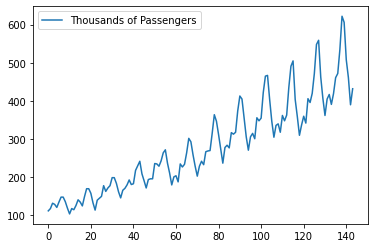

In [45]:
df.plot()

In [46]:
df.columns =['Month','Thousands of Passengers']
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [47]:
df.columns =['ds','y']

In [48]:
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [49]:
df.drop(144,axis=0, inplace=True)

In [50]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [51]:
df['ds'] = pd.to_datetime(df['ds'])

In [52]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [53]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [54]:
from fbprophet import Prophet

In [55]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [56]:
#Initialize the Model
model = Prophet()

In [57]:
df.columns

Index(['ds', 'y'], dtype='object')

In [58]:
df.dropna(axis=0, inplace=True)

In [59]:
df.head()


,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [60]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [62]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [63]:
#Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

# **I will try to make future date for the next 365 days**

In [64]:
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


In [65]:
prediction =model.predict(future_dates)

In [66]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,53.612095,112.017619,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,51.362130,105.484147,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,81.915644,139.227676,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,78.969835,136.130374,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,83.561044,138.467965,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


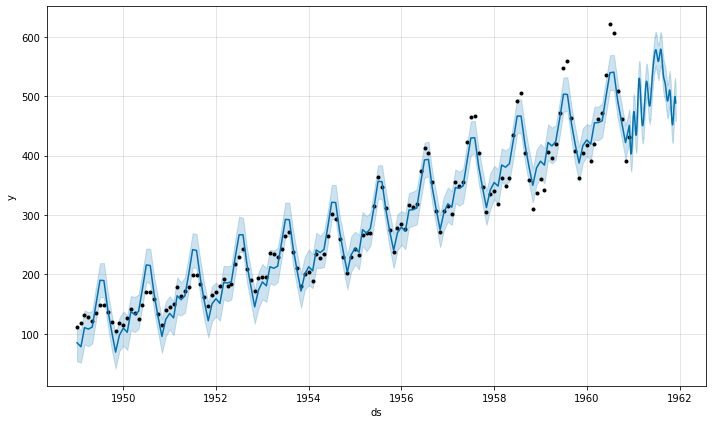

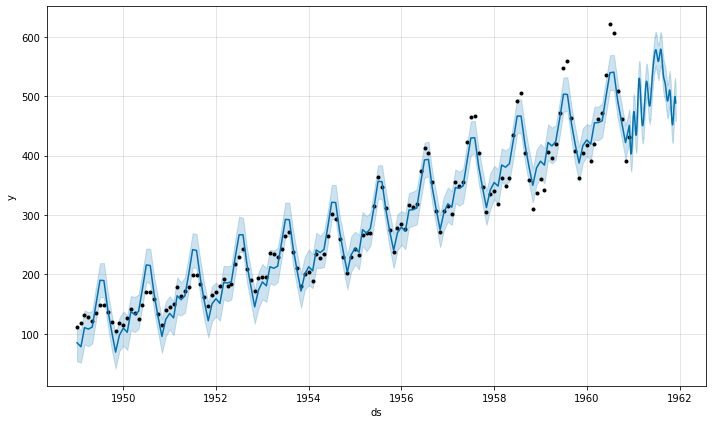

In [67]:
# plot the predicted projection
model.plot(prediction)

# **The dotted line is for the forecasted values and the dark blue line is for the actual values**



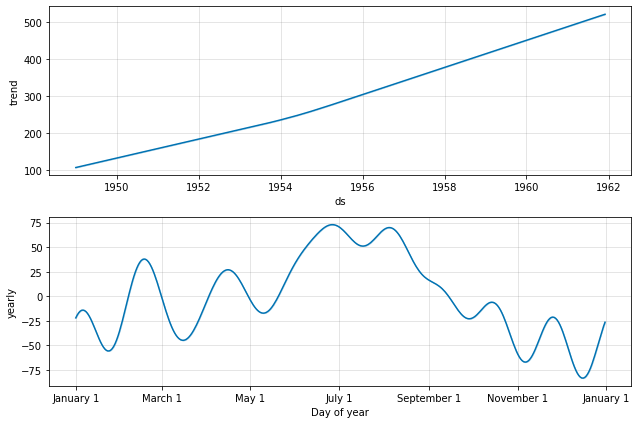

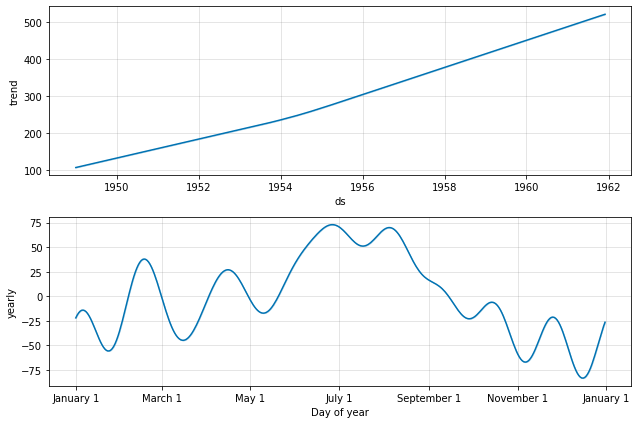

In [74]:
# visualize Each Components [Trends, yearly]
model.plot_components(prediction)

# **Analyzing Time Series Data with Prophet**

The Prophet algorithm is an additive model, which means that it detects the following trend and seasonality from the data first, then combine them together to get the forecasted values.

Overall Trend
Yearly, Weekly, Daily Seasonality
Holiday Effect

And this means that by looking at the trend and the seasonality that are detected by the Prophet, we can gain quite a lot of useful insights from the model.


Time Series Analysis

1960-1962
Cross Validation


1960-61---Train dataset


1961-62--Test dataset


1962-63---Validation

In [69]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [70]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial=' 730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.838387,158.192730,150.0,1951-01-18
1,1951-03-01,171.224502,170.596699,171.884960,178.0,1951-01-18
2,1951-04-01,159.628157,158.251125,160.991511,163.0,1951-01-18
3,1951-05-01,145.666500,143.483064,147.717888,172.0,1951-01-18
4,1951-06-01,180.679910,177.519625,183.735251,178.0,1951-01-18


In [71]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


In [72]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


In [75]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
165,359 days,767.192965,27.698248,21.737830,0.069323,0.061258,0.250000
166,360 days,770.736150,27.762135,22.023183,0.070200,0.061258,0.227273
167,362 days,860.697354,29.337644,23.247995,0.069206,0.061258,0.227273
168,364 days,834.406224,28.886091,22.181478,0.066297,0.051361,0.272727
169,365 days,976.781505,31.253504,24.035330,0.071479,0.061675,0.318182


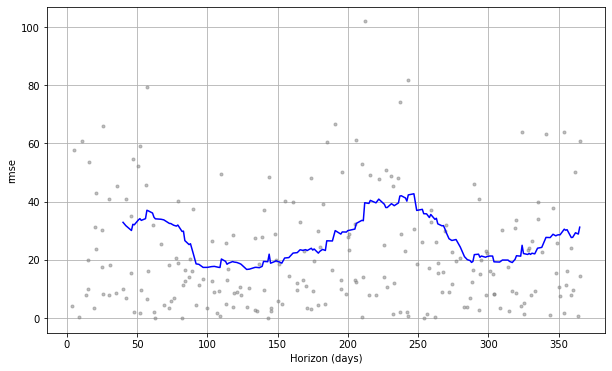

In [73]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')